<a href="https://colab.research.google.com/github/virginsky/Kaggle_practice/blob/main/6_23_%EC%8B%9C%ED%97%98%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

당뇨병 예측

In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
(df['BMI']==0).sum()

11

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [ ]:
for col in columns:
  df[col].replace(0,np.NaN, inplace = True)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.dropna(inplace = True)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


EDA and Data Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
def hist_count(column, data):
  if column in data:
    f, axes = plt.subplots(1,1,figsize = (15,5))
    sns.countplot(x = column, data = data)
    plt.xticks(rotation = 90)
    plt.suptitle(column, fontsize = 20)
    plt.show()
  plt.show()

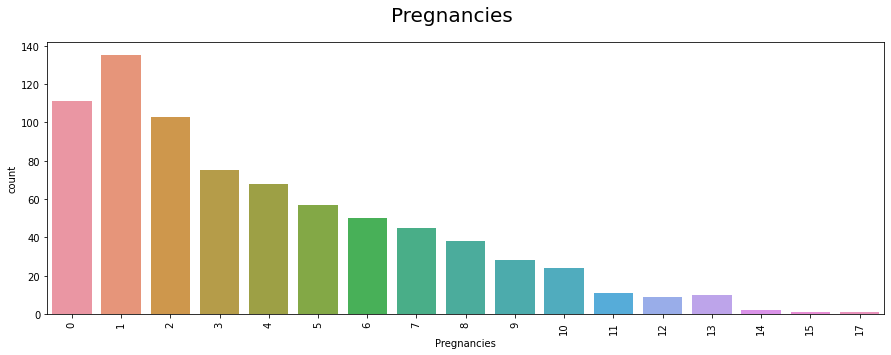

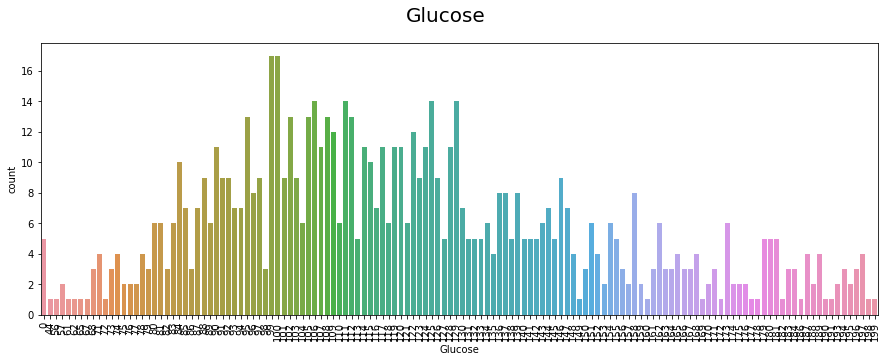

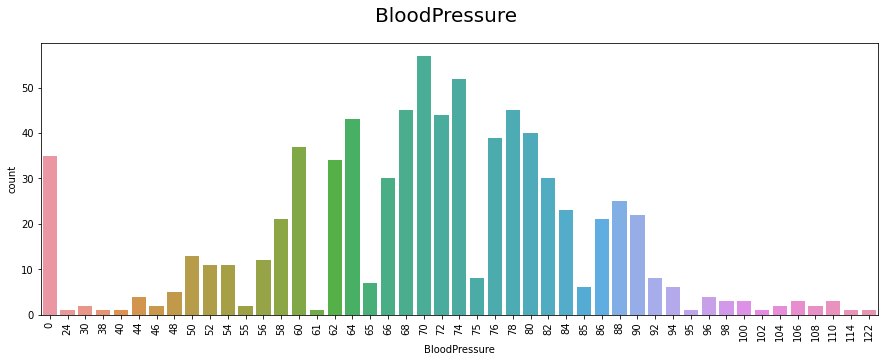

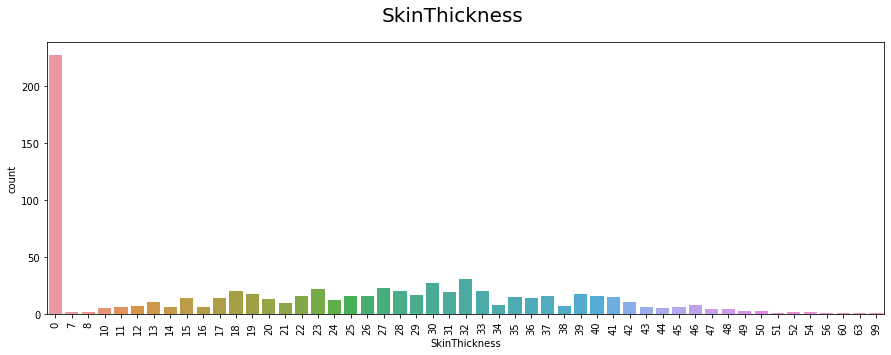

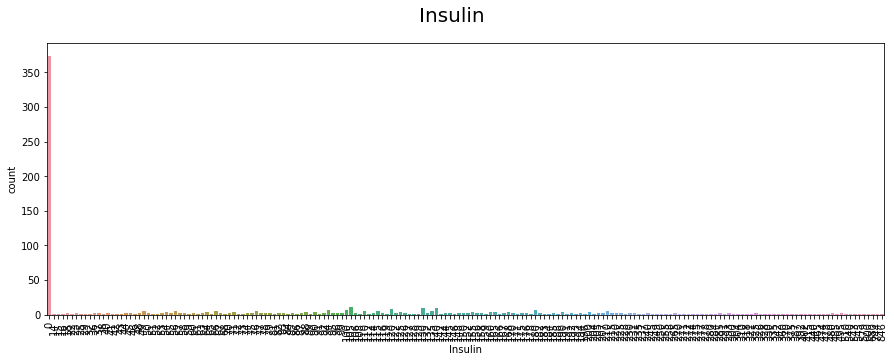

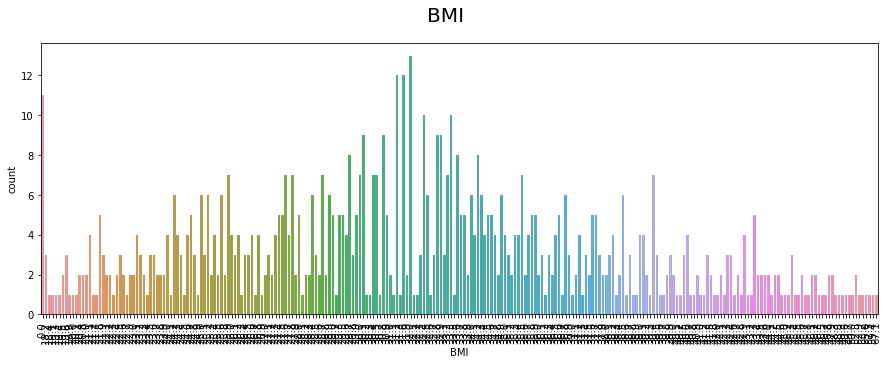

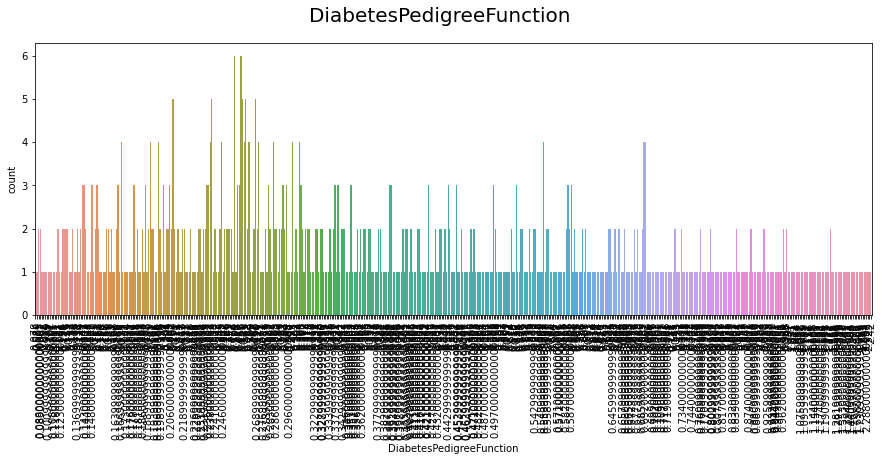

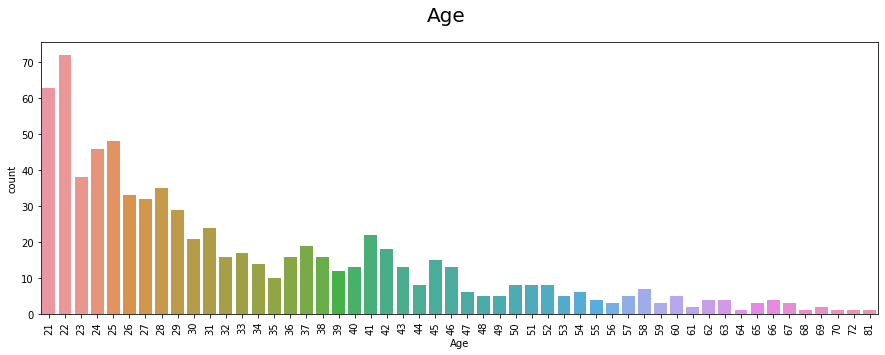

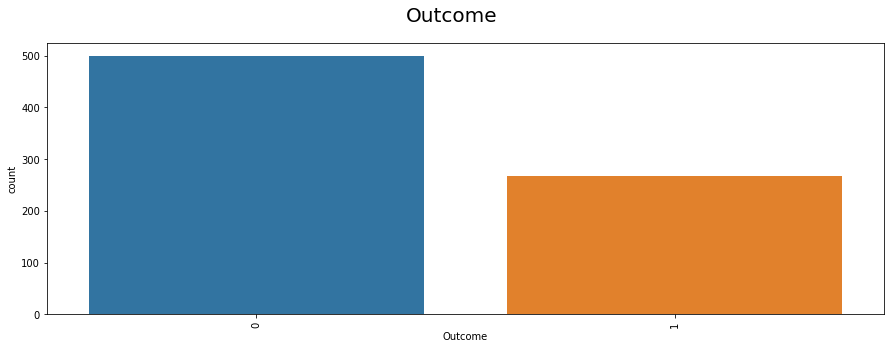

In [ ]:
for column in df.columns:
  hist_count(column,df)

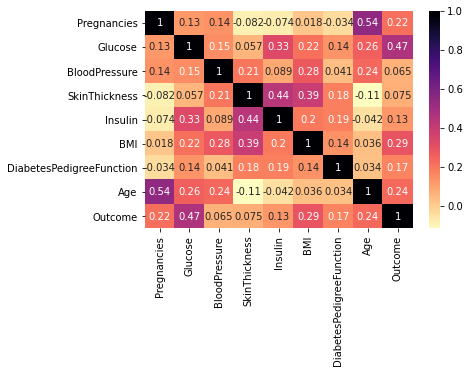

In [ ]:
# Corrlation matrix
sns.heatmap(df.corr(),annot = True, cmap = 'magma_r')

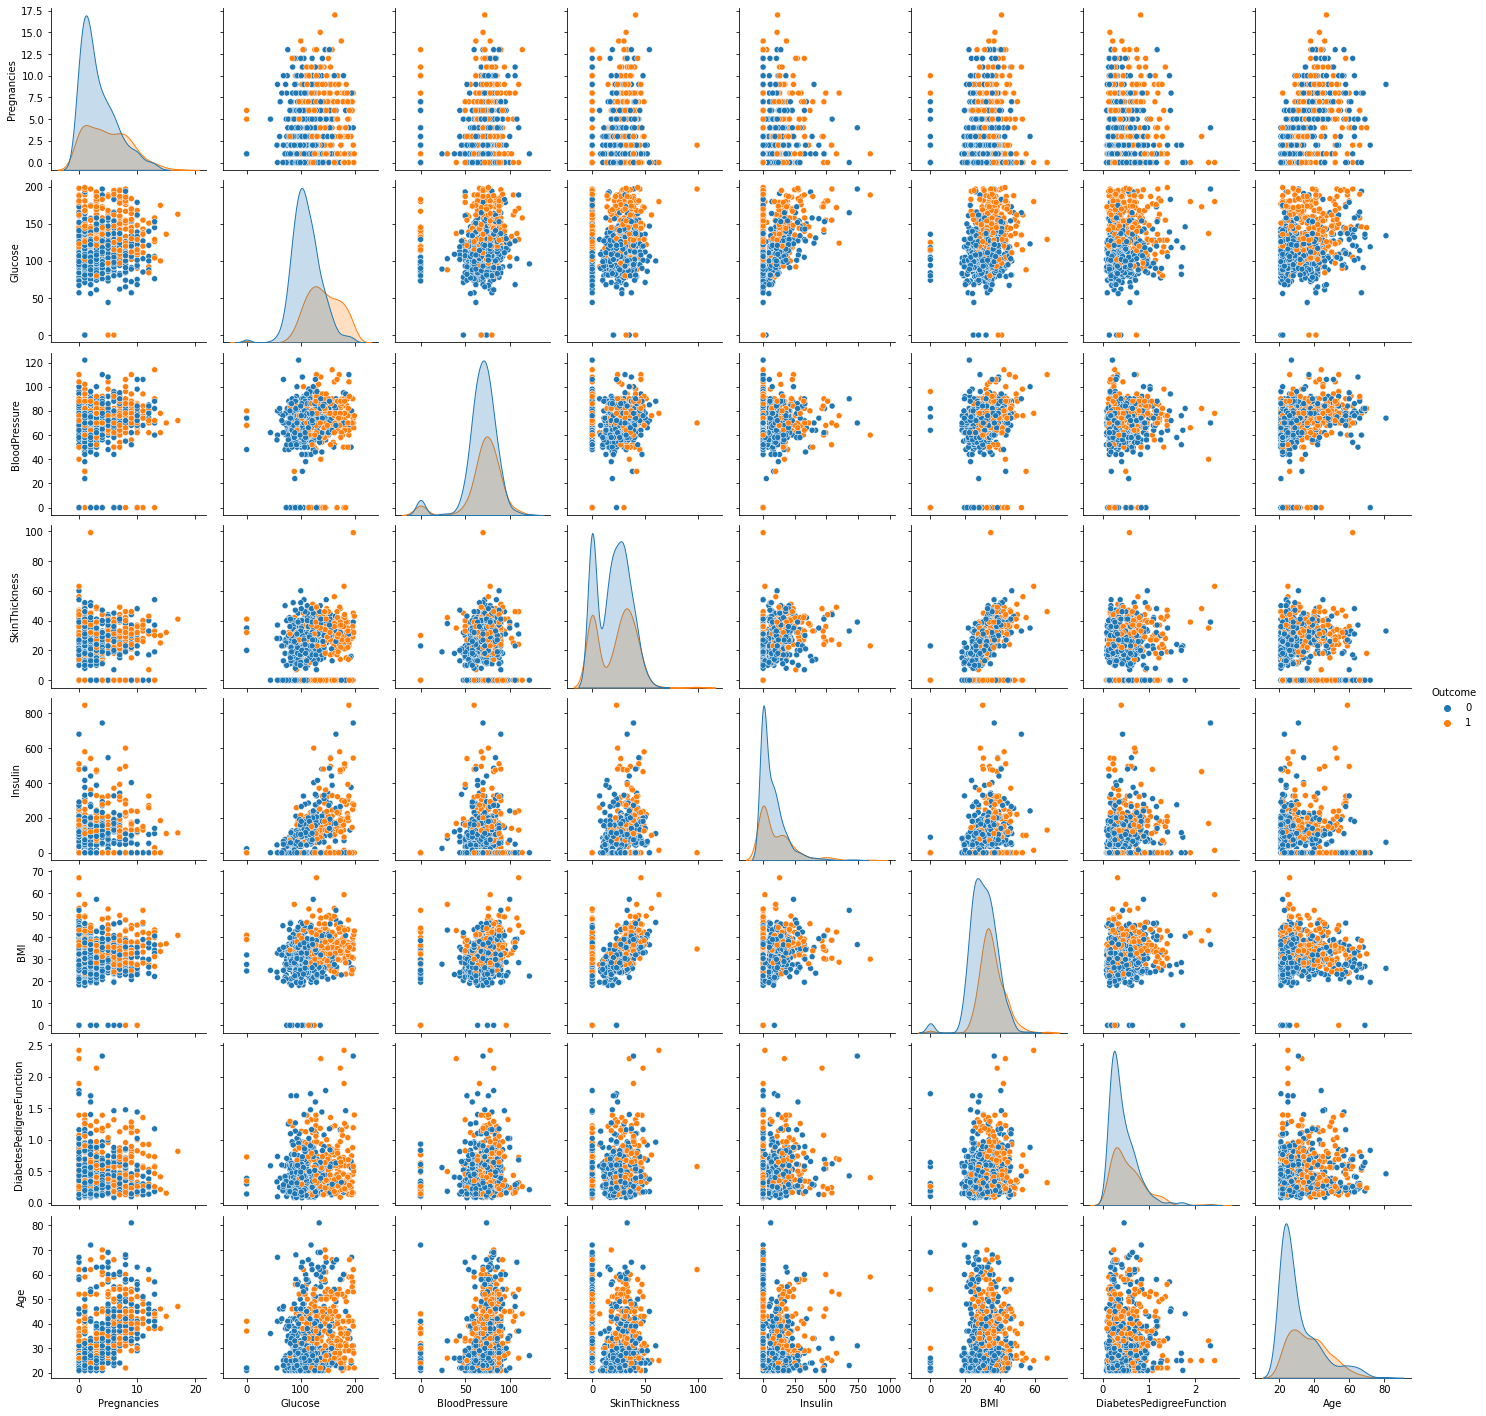

In [ ]:
#pairplpting
sns.pairplot(df, hue = 'Outcome')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'],axis = 1)
Y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

#data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)

In [ ]:
X_train.shape

(313, 8)

#keras modeling

In [ ]:
np.random.seed(42)
from keras import Input,models,layers,losses,optimizers, metrics
from tensorflow.keras import regularizers
from tensorflow.keras import initializers


model = models.Sequential()

model.add(layers.Dense(16, kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42), activation='relu',input_shape = (8,)))

model.add(layers.Dense(8, kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42), activation = 'relu'))
# model.add(layers.Dense(4, kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42), activation = 'relu'))

model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import ModelCheckpoint
#checkpoint :score the best model
ckpt_model = 'pima_weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model,
                             monitor = 'val_acc',
                             verbose = 1,
                             save_best_only = True,
                             mode ='max')

callbacks_list = [checkpoint]

In [ ]:
print('Starting training....')
history = model.fit(x = scaled_x_train,y = y_train, epochs = 500, validation_split=0.01,batch_size=16, callbacks=callbacks_list,verbose=0)

Starting training....

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to pima_weights.best.hdf5

Epoch 00002: val_acc did not improve from 0.50000

Epoch 00003: val_acc did not improve from 0.50000

Epoch 00004: val_acc did not improve from 0.50000

Epoch 00005: val_acc did not improve from 0.50000

Epoch 00006: val_acc did not improve from 0.50000

Epoch 00007: val_acc did not improve from 0.50000

Epoch 00008: val_acc did not improve from 0.50000

Epoch 00009: val_acc did not improve from 0.50000

Epoch 00010: val_acc did not improve from 0.50000

Epoch 00011: val_acc did not improve from 0.50000

Epoch 00012: val_acc did not improve from 0.50000

Epoch 00013: val_acc did not improve from 0.50000

Epoch 00014: val_acc did not improve from 0.50000

Epoch 00015: val_acc did not improve from 0.50000

Epoch 00016: val_acc did not improve from 0.50000

Epoch 00017: val_acc did not improve from 0.50000

Epoch 00018: val_acc did not improve from 0.50000

Epoch 00019: val_a

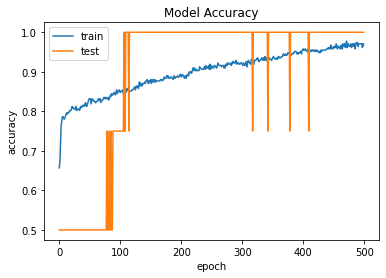

In [ ]:
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

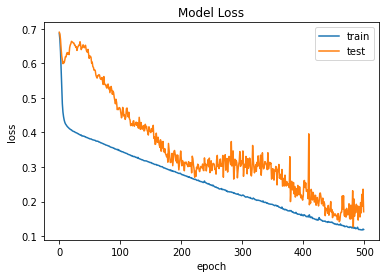

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model.load_weights('pima_weights.best.hdf5')

In [ ]:
# print final accuracy
scores = model.evaluate(scaled_x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 79.75%


# Iris dataset

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical


data = pd.read_csv('/content/Iris.csv')
data = data.drop(['Id'],axis = 1)

In [ ]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = data.drop(['Species'],axis = 1)
Y = data['Species']

In [ ]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.1, random_state = 42)

In [ ]:
X_train.shape

(135, 4)

In [ ]:
from keras.layers import Dense
model = Sequential()
model.add(Dense(32,activation='relu', input_shape = (4,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_48 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 3)                 15        
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam', metrics = ['acc'])

In [ ]:
model.fit(X_train,y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 1.5037 - acc: 0.2114
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 1.3479 - acc: 0.3318
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 1.2199 - acc: 0.3053
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0681 - acc: 0.3529
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0130 - acc: 0.4384
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9797 - acc: 0.6726
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9535 - acc: 0.6769
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9298 - acc: 0.6696
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8880 - acc: 0.6830
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8694 - acc: 0.6743
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8117 

In [ ]:
# print final accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 100.00%


# 와인 데이터

In [ ]:
import numpy as np
import pandas as pd
red = pd.read_csv('/content/winequality-red.csv')
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red.isna().sum().sum()

0

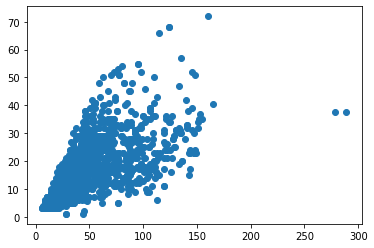

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(red['total sulfur dioxide'],red['free sulfur dioxide'])

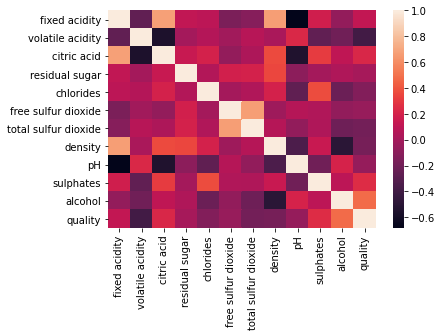

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = red.corr()
sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels=corr.columns.values)

In [ ]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

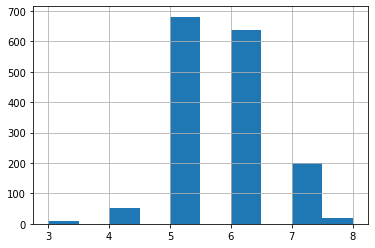

In [ ]:
red['quality'].hist()

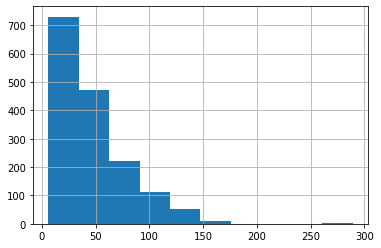

In [ ]:
red['total sulfur dioxide'].hist()

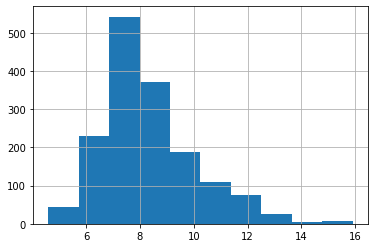

In [ ]:
red['fixed acidity'].hist()

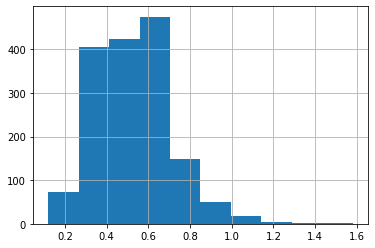

In [ ]:
red['volatile acidity'].hist()

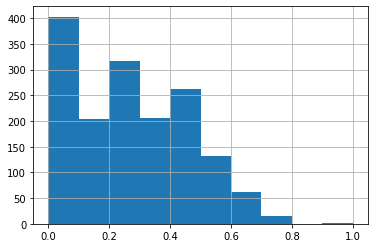

In [ ]:
red['citric acid'].hist()

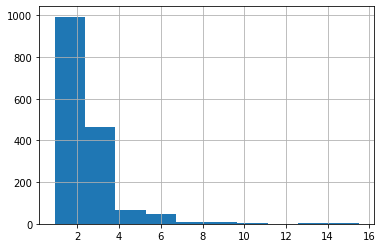

In [ ]:
red['residual sugar'].hist()

In [ ]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
from sklearn.model_selection import train_test_split

X = red.iloc[:,0:11]
y = red['quality']

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)
y

array([2, 2, 2, ..., 3, 2, 3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
y_train_cat = to_categorical(y_train,6)
y_test_cat = to_categorical(y_test,6)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(128, activation ='relu', input_shape = (11,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_68 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_69 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_70 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_71 (Dense)             (None, 6)                 102       
Total params: 12,502
Trainable params: 12,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
model.fit(X_train,y_train_cat, epochs=500,validation_split=0.01, verbose= 1)

Epoch 1/500
40/40 [==============================] - 1s 11ms/step - loss: 1.3926 - acc: 0.4731 - val_loss: 1.2007 - val_acc: 0.4615
Epoch 2/500
40/40 [==============================] - 0s 2ms/step - loss: 0.9899 - acc: 0.6090 - val_loss: 1.0933 - val_acc: 0.4615
Epoch 3/500
40/40 [==============================] - 0s 2ms/step - loss: 0.9987 - acc: 0.6115 - val_loss: 1.0971 - val_acc: 0.3846
Epoch 4/500
40/40 [==============================] - 0s 2ms/step - loss: 0.9249 - acc: 0.6271 - val_loss: 1.1360 - val_acc: 0.4615
Epoch 5/500
40/40 [==============================] - 0s 2ms/step - loss: 0.9222 - acc: 0.6028 - val_loss: 1.0281 - val_acc: 0.6154
Epoch 6/500
40/40 [==============================] - 0s 3ms/step - loss: 0.9089 - acc: 0.6248 - val_loss: 0.9344 - val_acc: 0.6923
Epoch 7/500
40/40 [==============================] - 0s 2ms/step - loss: 0.8713 - acc: 0.6536 - val_loss: 0.8810 - val_acc: 0.8462
Epoch 8/500
40/40 [==============================] - 0s 2ms/step - loss: 0.8405 - 

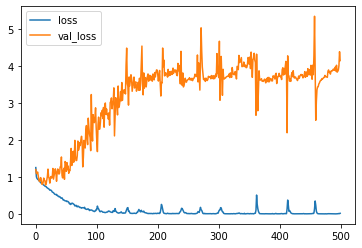

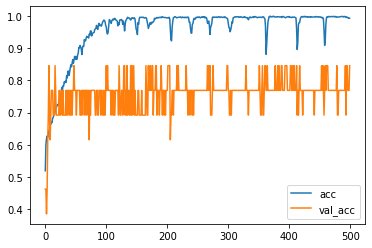

In [ ]:
import pandas as pd
losses = pd.DataFrame(model.history.history)


losses[['loss','val_loss']].plot()
losses[['acc','val_acc']].plot()

# evaludate model

In [ ]:
model.evaluate(X_test,y_test_cat, verbose=0)

[3.6613974571228027, 0.6343749761581421]

In [ ]:
predictions = le.inverse_transform(np.argmax(model.predict(X_test), axis=-1))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(le.inverse_transform(y_test),predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.10      0.15        10
           5       0.70      0.68      0.69       130
           6       0.62      0.64      0.63       132
           7       0.58      0.67      0.62        42
           8       0.00      0.00      0.00         5

    accuracy                           0.63       320
   macro avg       0.37      0.35      0.35       320
weighted avg       0.63      0.63      0.63       320



# Cifar10

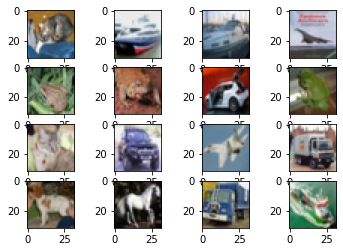

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10

def show_imgs(X):
  plt.figure(1)
  k=0
  for i in range(0,4):
    for j in range(0,4):
      plt.subplot2grid((4,4),(i,j))
      plt.imshow(X[k])
      k = k+1
  plt.show()

(X_train,y_train), (X_test,y_test) = cifar10.load_data()
show_imgs(X_test[:16])

# Data Augmenation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 90, width_shift_range = 0.1,height_shift_range = 0.1, horizontal_flip = True)

datagen.fit(X_train)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Dropout, BatchNormalization,Conv2D, MaxPool2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

def lr_schedule(epoch):
  learning_rate = 0.001
  if epoch >75:
    learning_rate = 0.0005
  if epoch >100:
    learning_rate = 0.0003
  return learning_rate

(X_train,y_train), (X_test,y_test) = cifar10.load_data()
X_train =  X_train.astype('float32')
X_test = X_test.astype('float32')

# z-score
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train- mean) / (std+1e-7)
X_test = (X_test - mean) / (std+1e-7)

num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


weight_decay = 1e-5
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(weight_decay),activation = 'relu',input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(weight_decay),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(weight_decay),activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(weight_decay),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(weight_decay),activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(weight_decay),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)      

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)
datagen.fit(X_train)

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['acc'])


In [ ]:
batch_size = 64
model.fit(datagen.flow(X_train,y_train, batch_size=batch_size), steps_per_epoch=X_train.shape[0] // batch_size, 
                    epochs=500,verbose=1, validation_data = (X_test,y_test),callbacks = [LearningRateScheduler(lr_schedule)]
                    )
#save
model_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)
model.save_weights('model.h5')

#test
scores = model.evaluate(X_test,y_test,batch_size=128,verbose=1)
print('\n Test result :%.3f loss : %.3f' % (scores[1]*100), scores[0])

Epoch 1/500
781/781 [==============================] - 456s 584ms/step - loss: 1.8297 - acc: 0.4222 - val_loss: 1.4073 - val_acc: 0.5329
Epoch 2/500
781/781 [==============================] - 467s 597ms/step - loss: 1.3130 - acc: 0.5564 - val_loss: 1.1705 - val_acc: 0.6235
Epoch 3/500
781/781 [==============================] - 466s 596ms/step - loss: 1.0744 - acc: 0.6268 - val_loss: 0.9523 - val_acc: 0.6836
Epoch 4/500
781/781 [==============================] - 466s 597ms/step - loss: 0.9424 - acc: 0.6750 - val_loss: 0.8671 - val_acc: 0.7107
Epoch 5/500
781/781 [==============================] - 467s 598ms/step - loss: 0.8644 - acc: 0.7017 - val_loss: 0.8584 - val_acc: 0.7191
Epoch 6/500
781/781 [==============================] - 465s 596ms/step - loss: 0.7984 - acc: 0.7249 - val_loss: 0.7251 - val_acc: 0.7616
Epoch 7/500
781/781 [==============================] - 464s 595ms/step - loss: 0.7579 - acc: 0.7400 - val_loss: 0.6686 - val_acc: 0.7769
Epoch 8/500
781/781 [====================